In [206]:
%matplotlib inline 

import tweepy
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import datetime
from datetime import timezone
from pytz import timezone
from datetime import timedelta
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib
matplotlib.style.use('ggplot')


ckey = ''
csecrect = ''
atoken = ''
asecret = ''


class listener(StreamListener):

    def on_data(self, raw_data):
        print(raw_data)
        return True

    def on_error(self, status_code):
        print(status_code)


In [207]:
auth = OAuthHandler(ckey, csecrect)
auth.set_access_token(atoken, asecret)
twitterStream = Stream (auth, listener())
# twitterStream.filter(track=["#trump"])

count = 2000

api = tweepy.API(auth)
# new_tweets = api.user_timeline(screen_name = "rogerfederer",count=200)
new_tweets = api.user_timeline(screen_name = "realDonaldTrump",count=count)





Got 200 tweets


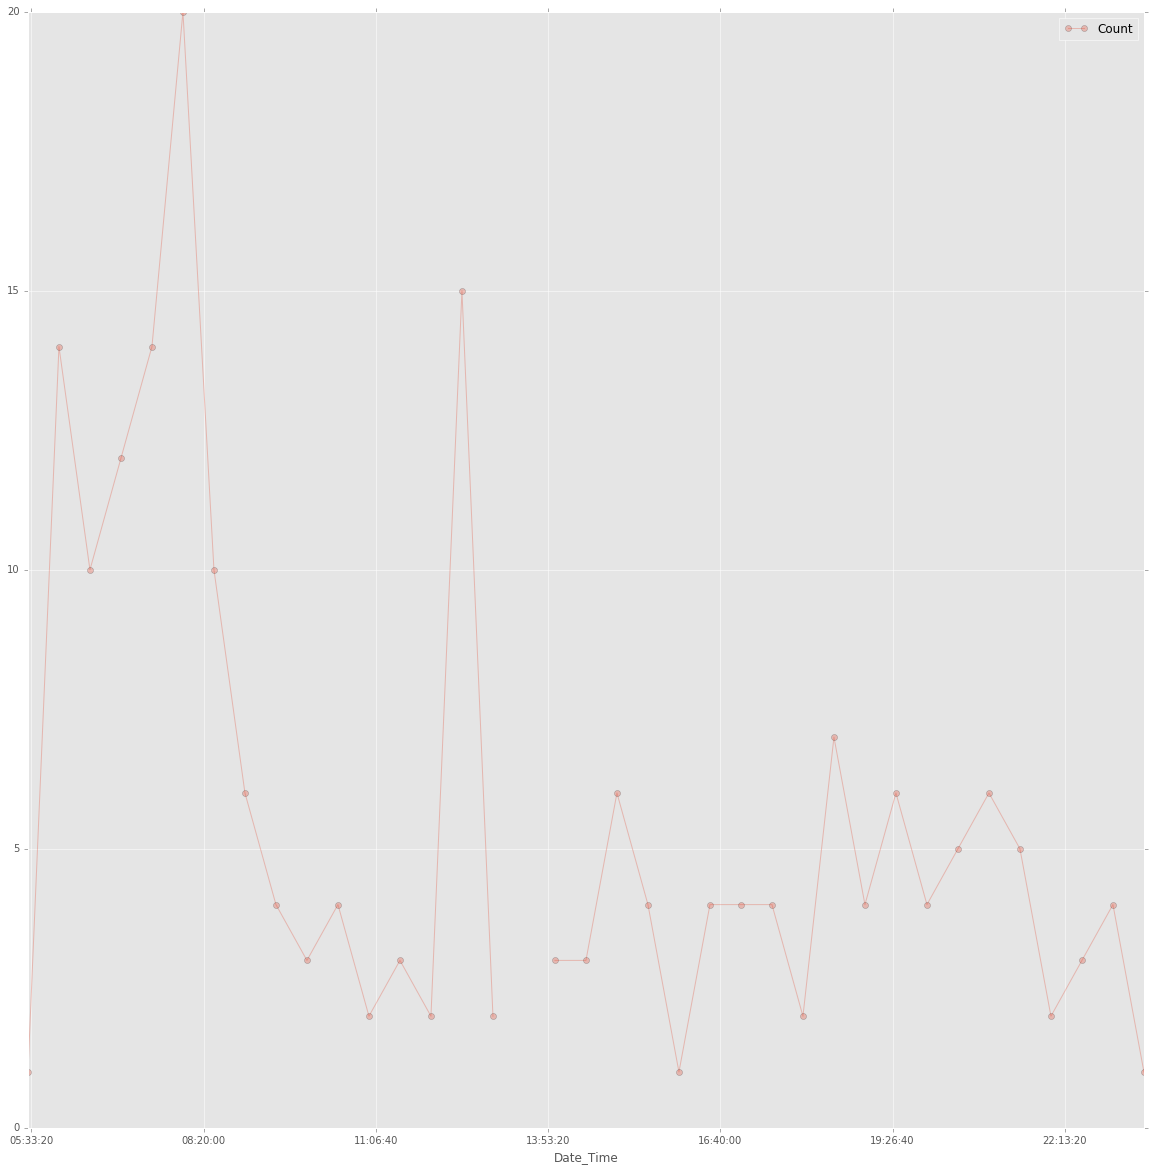

In [212]:


eastern = timezone('US/Eastern')
zurich = timezone('Europe/Zurich')

# Quick day light saving hack
dls = timedelta(seconds=3600)

fmt = '%Y-%m-%d %H:%M:%S %Z%z'
simple_time_format = '%H:%M'
# Used to put all timestamps in one day
one_day_time_format = '2017-01-01 %H:%M:%S'

outtweets = [[tweet.id_str, tweet.created_at, tweet.text.encode("utf-8")] for tweet in new_tweets]

print("Got {0} tweets".format(len(outtweets)))

dt_series = []

for tweets in outtweets:
    timestamp = tweets[1]
    # print(timestamp)
    loc_dt = zurich.localize(timestamp) + td
#     print("Localized Zurich Timezone: {0}".format(loc_dt.strftime(fmt)))    
    eastern_dt = loc_dt.astimezone(eastern)
#     print("Localized Eastern Timezone: {0}".format(eastern_dt.strftime(one_day_time_format)))
    
    one_day_dt =datetime.datetime.strptime(eastern_dt.strftime(one_day_time_format), '%Y-%m-%d %H:%M:%S')
    
    dt_series.append(one_day_dt)
    

series = pd.Series(1, index=dt_series)
binned = series.resample('30T').sum()

counted = Counter(dt_series)
values = []

for key, value in dict(counted).items():
    values.append(value)

df2 = pd.DataFrame({ 'Date_Time' : list(counted),
                     'Count' : values})

binned_df = pd.DataFrame({'Date_Time':binned.index, 'Count':binned.values})

# print(binned.index)
# print(binned.values)


# print(binned_df.Date_Time.dt.time)

binned_df.plot.line(x=binned_df.Date_Time.dt.time, y='Count', marker='o', alpha=0.3, figsize=(20,20))


# print(df2.Date_Time.dt.hour)
# df2.plot.line(x=df2.Date_Time.dt.time, y='Count', marker='o', alpha=0.3, figsize=(20,20))

# print(df2.Date_Time.dt.time)
# df2.plot.line(x=df2.Date_Time.dt.time)
# ppd = pd.Series(dt_series)
# print(ppd)
    

In [101]:
list(counted)

[datetime.datetime(2017, 2, 8, 20, 5, 53, tzinfo=<DstTzInfo 'US/Eastern' EST-1 day, 19:00:00 STD>),
 datetime.datetime(2017, 2, 8, 14, 22, 33, tzinfo=<DstTzInfo 'US/Eastern' EST-1 day, 19:00:00 STD>),
 datetime.datetime(2017, 2, 8, 10, 54, 1, tzinfo=<DstTzInfo 'US/Eastern' EST-1 day, 19:00:00 STD>),
 datetime.datetime(2017, 2, 8, 14, 39, 51, tzinfo=<DstTzInfo 'US/Eastern' EST-1 day, 19:00:00 STD>),
 datetime.datetime(2017, 2, 8, 10, 51, 1, tzinfo=<DstTzInfo 'US/Eastern' EST-1 day, 19:00:00 STD>),
 datetime.datetime(2017, 2, 8, 12, 41, 9, tzinfo=<DstTzInfo 'US/Eastern' EST-1 day, 19:00:00 STD>),
 datetime.datetime(2017, 2, 8, 10, 23, 29, tzinfo=<DstTzInfo 'US/Eastern' EST-1 day, 19:00:00 STD>),
 datetime.datetime(2017, 2, 9, 6, 57, 59, tzinfo=<DstTzInfo 'US/Eastern' EST-1 day, 19:00:00 STD>),
 datetime.datetime(2017, 2, 8, 16, 46, 14, tzinfo=<DstTzInfo 'US/Eastern' EST-1 day, 19:00:00 STD>),
 datetime.datetime(2017, 2, 8, 17, 7, 18, tzinfo=<DstTzInfo 'US/Eastern' EST-1 day, 19:00:00 STD

In [116]:
for key, value in dict(counted).items():
    print(key)
    print(value)


2017-02-08 20:05:53-05:00
1
2017-02-08 14:22:33-05:00
1
2017-02-08 10:51:01-05:00
1
2017-02-08 10:54:01-05:00
1
2017-02-08 16:46:14-05:00
1
2017-02-08 14:39:51-05:00
1
2017-02-08 12:41:09-05:00
1
2017-02-08 10:23:29-05:00
1
2017-02-08 17:07:18-05:00
1
2017-02-09 06:57:59-05:00
1


In [176]:
series = pd.Series(1, index=dt_series)
binned = series.resample('30T').sum()

binned_df = pd.DataFrame({'Date_Time':binned.index, 'Count':binned.values})
print(binned_df)


    Count                 Date_Time
0     1.0 2017-02-08 14:00:00-05:00
1     1.0 2017-02-08 14:30:00-05:00
2     NaN 2017-02-08 15:00:00-05:00
3     NaN 2017-02-08 15:30:00-05:00
4     NaN 2017-02-08 16:00:00-05:00
5     1.0 2017-02-08 16:30:00-05:00
6     1.0 2017-02-08 17:00:00-05:00
7     NaN 2017-02-08 17:30:00-05:00
8     NaN 2017-02-08 18:00:00-05:00
9     NaN 2017-02-08 18:30:00-05:00
10    NaN 2017-02-08 19:00:00-05:00
11    NaN 2017-02-08 19:30:00-05:00
12    1.0 2017-02-08 20:00:00-05:00
13    NaN 2017-02-08 20:30:00-05:00
14    NaN 2017-02-08 21:00:00-05:00
15    NaN 2017-02-08 21:30:00-05:00
16    NaN 2017-02-08 22:00:00-05:00
17    NaN 2017-02-08 22:30:00-05:00
18    NaN 2017-02-08 23:00:00-05:00
19    NaN 2017-02-08 23:30:00-05:00
20    NaN 2017-02-09 00:00:00-05:00
21    NaN 2017-02-09 00:30:00-05:00
22    NaN 2017-02-09 01:00:00-05:00
23    NaN 2017-02-09 01:30:00-05:00
24    NaN 2017-02-09 02:00:00-05:00
25    NaN 2017-02-09 02:30:00-05:00
26    NaN 2017-02-09 03:00:0